# Import

In [2]:
from sklearn.datasets import load_boston
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import scale
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.cross_validation import KFold
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import pandas as pd

# Data

Read in our univeristy and crime data as a dataframe, then split the outcomes and the features into arrays. ONly using 2 feautures for now, since we can only use quantitative data at the moment.... to be added later.

In [3]:
df = pd.read_csv('cleaned_final.csv', encoding='iso-8859-1')

print(df)

      Unnamed: 0  UNITID                                             INSTNM  \
0              1  100654                           Alabama A & M University   
1              2  100663                University of Alabama at Birmingham   
2              3  100690                                 Amridge University   
3              4  100706                University of Alabama in Huntsville   
4              5  100724                           Alabama State University   
5              6  100751                          The University of Alabama   
6              7  100760                  Central Alabama Community College   
7              8  100812                            Athens State University   
8              9  100830                    Auburn University at Montgomery   
9             10  100858                                  Auburn University   
10            11  100937                        Birmingham Southern College   
11            12  101028             Chattahoochee V

In [4]:
crime = df['crime_rate'] #outcomes
crime_rate = np.array(crime)
print(crime_rate)

[ 3.56272267  1.60444967  0.         ...,  0.          0.          0.        ]


In [5]:
feature = df.drop('crime_rate',axis=1) #variables
#features = feature.to_dict()['fin_indep']
features = np.array(feature[['fin_indep','student_pop','Public','Private non-profit','Private for-profit', 'firstgen_pct','fam_income','Not classified','certificate-degree',"associate's-degree","bachelor's-degree","graduate-degree"]])
print(features)

[[  1.29593046e-01   5.33300000e+03   1.00000000e+00 ...,   0.00000000e+00
    1.00000000e+00   0.00000000e+00]
 [  3.11615321e-01   1.86980000e+04   1.00000000e+00 ...,   0.00000000e+00
    1.00000000e+00   0.00000000e+00]
 [  8.94259819e-01   6.25000000e+02   0.00000000e+00 ...,   0.00000000e+00
    1.00000000e+00   0.00000000e+00]
 ..., 
 [  7.74729842e-01   7.50000000e+01   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  5.03105590e-01   6.70000000e+01   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  6.36593060e-01   2.43100000e+03   1.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]]


# Train-Test split

Split 80-20 train and test data, to use for model.

In [6]:
#split train and test data
feat_train, feat_test, crime_train, crime_test = train_test_split(features, crime_rate, test_size = 0.2, random_state=11)

In [7]:
#features set
print(feat_train)
print(feat_test.shape)
#outcome set
print(crime_train.shape)
print(crime_test.shape)

[[  6.11242604e-01   5.76000000e+02   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  7.66233766e-01   2.20100000e+03   1.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  6.80203046e-01   8.59000000e+02   0.00000000e+00 ...,   1.00000000e+00
    0.00000000e+00   0.00000000e+00]
 ..., 
 [  8.44897959e-01   7.00000000e+01   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  6.68478261e-01   1.31000000e+02   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  6.23847572e-01   5.47500000e+03   1.00000000e+00 ...,   1.00000000e+00
    0.00000000e+00   0.00000000e+00]]
(1159, 12)
(4632,)
(1159,)


# Scaling/Standardize

In [8]:
mins = np.min(feat_train, axis = 0)
maxes = np.max(feat_train, axis = 0)
diff = maxes - mins

In [9]:
diff

array([  9.61869136e-01,   1.95058000e+05,   1.00000000e+00,
         1.00000000e+00,   1.00000000e+00,   9.09209337e-01,
         1.22247223e+05,   1.00000000e+00,   1.00000000e+00,
         1.00000000e+00,   1.00000000e+00,   1.00000000e+00])

In [10]:
feat_train_stand = (feat_train - mins) / diff
feat_test_stand = (feat_test - mins) / diff

In [11]:
minCrime = np.min(crime_train)
maxCrime = np.max(crime_train)
diffCrime = maxCrime - minCrime

In [12]:
crime_train_stand = (crime_train - minCrime) / diffCrime
crime_test_stand = (crime_test - minCrime) / diffCrime

# K-Fold Cross Validation


In [13]:
kValues = [10,20,30,40,50,70, 100, 200, 250,275,300]

In [14]:
folds = KFold(len(feat_train), n_folds = 10, shuffle = True)
print(folds)

sklearn.cross_validation.KFold(n=4632, n_folds=10, shuffle=True, random_state=None)


In [15]:
for train_index, val_index in folds:
        print(train_index)

[   1    2    3 ..., 4629 4630 4631]
[   0    1    2 ..., 4629 4630 4631]
[   0    1    3 ..., 4629 4630 4631]
[   0    1    2 ..., 4629 4630 4631]
[   0    1    2 ..., 4626 4627 4630]
[   0    1    2 ..., 4629 4630 4631]
[   0    2    3 ..., 4629 4630 4631]
[   0    1    2 ..., 4629 4630 4631]
[   0    1    2 ..., 4628 4629 4631]
[   0    1    2 ..., 4629 4630 4631]


In [16]:
scores = {}
for k in kValues:
    currentScores = []
    for train_index, val_index in folds:
        current_train_feat = feat_train_stand[train_index]
        current_val_feat = feat_train_stand[val_index]
        current_train_crime, current_val_crime = crime_train[train_index], crime_train[val_index]
        neigh = KNeighborsRegressor(n_neighbors = k)
        print(neigh)
        neigh.fit(current_train_feat, current_train_crime)
        guesses = neigh.predict(current_val_feat)
        rmse = np.sqrt(mean_squared_error(guesses, current_val_crime))
        currentScores.append(rmse)
    scores[k] = currentScores

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=10, p=2,
          weights='uniform')
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=10, p=2,
          weights='uniform')
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=10, p=2,
          weights='uniform')
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=10, p=2,
          weights='uniform')
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=10, p=2,
          weights='uniform')
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=10, p=2,
          weights='uniform')
KNeighborsRegressor(algorith

# Plotting Error

In [40]:
keys = sorted(scores.keys())
means = []
stdevs = []
for each in keys:
    current = scores[each]
    means.append(np.mean(current)) 
    stdevs.append(np.std(current))

In [1]:
figure = plt.figure()
plt.plot(keys, means, 'bo:')
plt.xlabel('K')
plt.ylabel('Normalized RMSE')
plt.title('Error as a function of # of neighbors');

NameError: name 'plt' is not defined

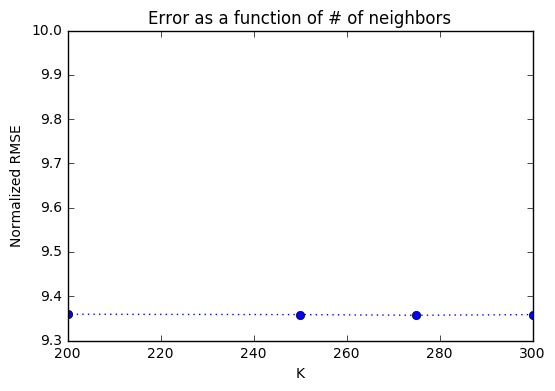

In [42]:
figure = plt.figure()
plt.plot(keys, means, 'bo:')
plt.xlabel('K')
plt.ylabel('Normalized RMSE')
plt.title('Error as a function of # of neighbors')
plt.xlim([200,300]);

From this, somewhere around 250 neighbors would be our ideal K neighbors, however this is probably a very inaccurate model since this large number means that it is likely that neighbors with similar attributes don't actually tend to have the same crime rates, based on our given data, with only the given attributes weighted equally.

Our total RMSE, or error of around 9.36 also indicates that our model is not a very accurate predictor for the number of attributes we are using.